# Asset management assignment

**Question 1** : 
For this exercise use the file ”Tickers”, which specifies the tickers of the 50 stocks you should use
given your group number. Retrieve monthly Book-to-Market data and monthly prices for your
stocks from 1980. Present annualized performance statistics (average return, volatility, Sharpe
ratio, skewness, kurtosis and max drawdown) for your stocks

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import scipy.stats
import yfinance as yf

In [26]:
data_set_bme = pd.read_csv("data-bme.csv")
ticker_file = open('Tickers - Group 2.txt', 'r')
ticker_file = ticker_file.read()

In [27]:
data_set_bme = data_set_bme.rename(columns={'public_date': 'date', 'TICKER': 'ticker'}) #we will assume the Public date as the date of our signal
ticker_file_list = ticker_file.split(',')
ticker_file_list = [e.strip() for e in ticker_file_list]
data_set_bme = data_set_bme[data_set_bme['ticker'].isin(ticker_file_list)] #Let's remove the ticker which we were not assigned

In [28]:
tickers = ticker_file
start_date = '1980-01-01'
end_date = '2022-12-31'

prices_df = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
prices_df = prices_df.rename(columns={'Close': 'Price', 'Ticker': 'TICKER'})

[*********************100%***********************]  50 of 50 completed


In [29]:
cols = ['Open', 'High', 'Low', 'Adj Close', 'Volume']

prices_df = prices_df.drop(columns=cols,level=1)
prices_df = prices_df.sort_index(axis=1, level=0)
prices_df.columns = prices_df.columns.droplevel(1)

In [30]:
cols = ['permno', 'adate', 'qdate']
data_set_bme.set_index('ticker', inplace=True)
data_set_bme.dropna()
data_set_bme = data_set_bme.drop(columns=cols)

In [31]:
#Transpose the bme dataframe 
data_set_bme = data_set_bme.pivot_table(index='date', columns='ticker', values='bm')
data_set_bme.columns = pd.MultiIndex.from_product([data_set_bme.columns, ['bm']])
data_set_bme = data_set_bme.sort_index(axis=1)
data_set_bme.columns = data_set_bme.columns.droplevel(1)
data_set_bme.index = pd.to_datetime(data_set_bme.index)
data_set_bme.index = data_set_bme.index.strftime('%Y-%m')

In [32]:
prices_df.index = pd.to_datetime(prices_df.index)
#prices_df.index = prices_df.index.strftime('%Y-%m')

In [33]:
def stats(returns):
    avg_return = returns.mean(skipna=True)
    volatility = returns.std(skipna=True)
    sharpe_ratio = (avg_return / volatility) * np.sqrt(12)
    skewness = returns.skew(skipna=True)
    kurtosis = returns.kurtosis(skipna=True)

    rolling_cumulative_returns = (1 + returns).cumprod()
    rolling_max = rolling_cumulative_returns.rolling(window=12, min_periods=1).max()
    drawdown = rolling_cumulative_returns / rolling_max - 1
    max_drawdown = drawdown.min(skipna=True)

    statistics_df = pd.DataFrame({
        'Average Return': avg_return * 12,
        'Volatility': volatility * np.sqrt(12),
        'Sharpe Ratio': sharpe_ratio,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Max Drawdown': max_drawdown})
    return statistics_df
# create a dataframe with the statistics


# set the index of the dataframe to the ticker
returns_df = prices_df.pct_change()
stats_df = stats(returns_df)
stats_df

,Average Return,Volatility,Sharpe Ratio,Skewness,Kurtosis,Max Drawdown
AIZ,0.006624,0.070872,0.093458,-0.289217,22.245036,-0.497244
ARE,0.005735,0.065043,0.088180,-0.223236,15.986949,-0.471024
ATO,0.004959,0.050883,0.097450,-0.153569,10.073593,-0.276404
CARR,0.025439,0.094182,0.270100,1.689791,17.885133,-0.252754
CBOE,0.006686,0.055600,0.120255,-0.359505,8.482608,-0.360401
CE,0.008789,0.087453,0.100497,-0.322703,12.298039,-0.472954
CMCSA,0.009562,0.077873,0.122784,0.394022,6.584563,-0.348259
CTVA,0.012699,0.081811,0.155218,-0.198267,5.969932,-0.282353
DG,0.010273,0.056793,0.180884,-0.113076,12.140742,-0.231071
DPZ,0.011718,0.080967,0.144722,-0.587821,32.768753,-0.503000


**Question 2** : For each stock and each date, build a Momentum indicator which is defined as the cumulated
return over the past six months (note that, by construction, during the first six months of
the sample it will not be possible to build such momentum indicator). Use the characteristics
Book-to-Market and Momentum to build tercile portfolios, called: Value high, Value med and
Value low for Value (book-to-market); and MoM high, MoM med and MoM low for Momentum. To construct the six portfolios, at each date and for each one of the two characteristic, split
your 50 stocks in three equally weighted groups of similar sizes (example: for momentum in Jan
2000 you may have 16 stocks in the low Momentum group, 15 in the Middle group, 15 in the
high Momentum group and 4 stocks with missing observations at this date). Present annualized
performance statistics for the 6 portfolios.


In [34]:
def momentum_6m(stock_df):
    cum_returns = stock_df.add(1).rolling(window=6).apply(np.prod, raw = True) - 1
    cum_returns = cum_returns.drop(cum_returns.index[0:5])
    return cum_returns

returns_6m = momentum_6m(returns_df)
returns_6m

,AIZ,ARE,ATO,CARR,CBOE,CE,CMCSA,CTVA,DG,DPZ,...,PEG,PGR,QCOM,SPGI,STT,TROW,TSN,UDR,V,WY
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.220446e-16,NaN,NaN,0.050691,NaN,NaN,NaN,NaN,NaN,0.023904
1980-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.298711e-02,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,NaN,0.044355
1980-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.935484e-02,NaN,NaN,0.078341,NaN,NaN,NaN,NaN,NaN,0.060241
1980-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.935484e-02,NaN,NaN,0.060465,NaN,NaN,NaN,NaN,NaN,0.087302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.000000,-0.020946,-0.015061,-0.015780,0.016433,0.001562,0.015313,-0.014113,0.002714,-0.011121,...,1.226387e-02,0.013943,-0.049726,-0.033780,-0.009839,-0.007503,-0.019498,-0.040129,-0.010004,-0.008501
2022-12-27,0.007685,0.010697,0.007058,0.002874,0.018949,0.021865,0.014787,-0.000335,-0.004350,-0.007922,...,4.338284e-02,0.029419,-0.044268,-0.024382,-0.007078,0.001900,-0.002426,-0.015337,-0.002900,0.005431
2022-12-28,0.008215,-0.004580,0.014011,-0.013012,0.023203,-0.004753,0.018835,0.005660,0.010601,-0.033452,...,3.251348e-02,0.020855,-0.050084,-0.018054,-0.009283,-0.013238,0.006249,-0.013264,0.000830,-0.006487


In [35]:
def tercile_port(df):
    mean_returns = df.mean()
    sorted_returns = mean_returns.sort_values(ascending=False)
    n = len(sorted_returns)
    hi = sorted_returns[:n//3].index
    med = sorted_returns[n//3:2*n//3].index
    lo = sorted_returns[2*n//3:].index
    portfolio_returns = pd.DataFrame(index=df.index, columns=['hi', 'med', 'lo'])
    for date, row in df.iterrows():
        hi_returns = row[hi].mean()
        med_returns = row[med].mean()
        lo_returns = row[lo].mean()
        portfolio_returns.loc[date] = [hi_returns, med_returns, lo_returns]
    return portfolio_returns


In [36]:
mom_port = tercile_port(returns_6m)
bme_port = tercile_port(data_set_bme)

In [37]:
def annualized_stats(df):
    annualized_returns = df.mean() * 12
    annualized_vol = df.std()* np.sqrt(12)
    sharpe_ratio = annualized_returns / annualized_vol
    stats = pd.DataFrame({
        ' Annualized returns': annualized_returns,
        'Annualized volatility': annualized_vol,
        'Sharpe Ratio': sharpe_ratio})
    return stats

In [38]:
annualized_stats(mom_port)

,Annualized returns,Annualized volatility,Sharpe Ratio
hi,0.074798,0.130447,0.573401
med,0.052214,0.112295,0.464972
lo,0.030571,0.085142,0.359064


In [39]:
annualized_stats(bme_port)

,Annualized returns,Annualized volatility,Sharpe Ratio
hi,11.251299,0.998697,11.265981
med,6.724580,0.920320,7.306784
lo,3.743265,0.575035,6.509628


**Question 3** : Build two long-short portfolios for Value and Momentum using the tercile portfolios. Backtest
the portfolio and an equal weighed portfolio investing in the 50 stocks. Plot cumulated returns
and present annualized performance statistics

In [40]:
def backtest_ws(rets, weighting, estimation_window=23, **args):
    """
    Backtests a given weighting scheme, given some parameters:
    rets : asset returns to use to build the portfolio
    estimation_window: the window to use to estimate parameters
    weighting: the weighting scheme to use, must be a function that takes "rets", and a variable number of arguments
    """
    n_periods = rets.shape[0]
    # list of overlapping rolling return windows for estimation
    windows = [(start, start+estimation_window) for start in range(n_periods-estimation_window+1)]
    # list of portfolio weights over time
    weights = [weighting(rets.iloc[win[0]:win[1]], **args) for win in windows]
    # convert to DataFrame
    weights = pd.DataFrame(weights, index=rets.iloc[estimation_window-1:].index, columns=rets.columns)
    returns = (weights * rets).sum(axis="columns",  min_count=1) #mincount is to generate NAs if all inputs are NAs
    return returns

def weight_ew(r):
    w = [ 1/len(r.columns) for _ in range(len(r.columns))]
    w = np.array(w)
    return w

In [41]:
def long_short_portfolio(rets):
    long_short = pd.DataFrame({'long_short': rets['hi'] - rets['lo']})
    return long_short

In [42]:
bme_long_short = long_short_portfolio(bme_port)
mom_long_short = long_short_portfolio(mom_port)
equal_weighted = backtest_ws(returns_6m, weight_ew)

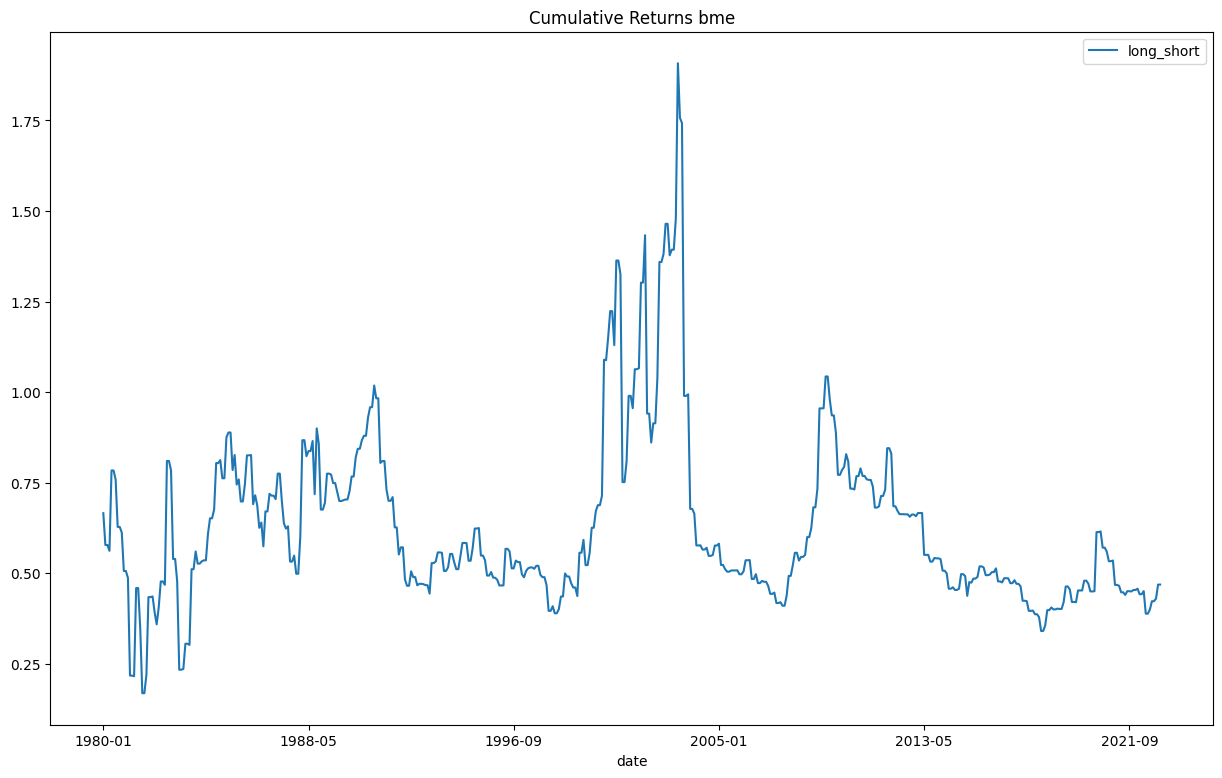

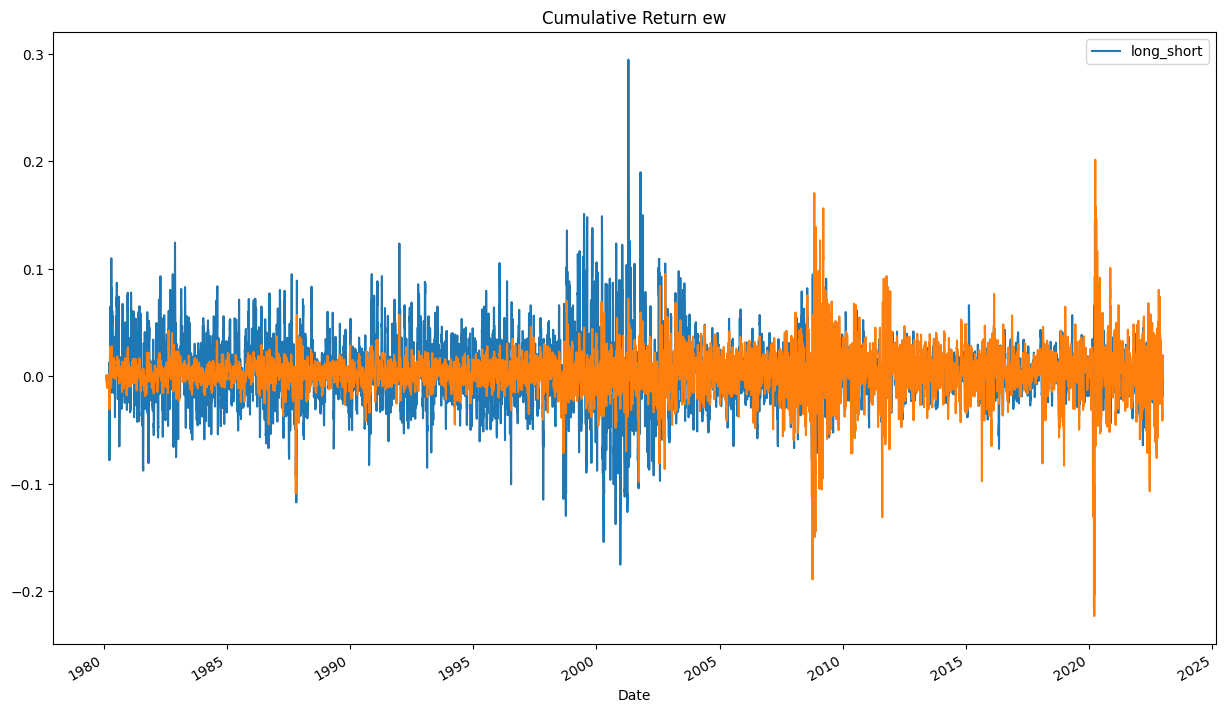

In [43]:
cum_bme_plot = bme_long_short.plot(figsize=(15, 9), title="Cumulative Returns bme")
cum_mom_plot = mom_long_short.plot(figsize=(15, 9), title="Cumulative Returns mom")
equal_weighted_plot = equal_weighted.plot(figsize=(15,9),title="Cumulative Return ew")

In [44]:
annualized_stats(bme_long_short)

,Annualized returns,Annualized volatility,Sharpe Ratio
long_short,7.508033,0.823511,9.117102


In [45]:
annualized_stats(mom_long_short)

,Annualized returns,Annualized volatility,Sharpe Ratio
long_short,0.043406,0.100137,0.433466


In [46]:
ew_port = pd.DataFrame(equal_weighted)
annualized_stats(ew_port)

,Annualized returns,Annualized volatility,Sharpe Ratio
0,0.032633,0.071884,0.453967


**Question 4** :  Naturally, neither Value nor Momentum is the perfect predictor of returns. To combine the
information that each characteristic contains, construct a composite characteristics. To this end,
standardize in each month each characteristic to have a cross-sectional mean (standard deviation)
of zero (one) and combine them into a single characteristic Sit defined as:

\begin{equation}
S_{it} = \frac{BM_{it} - E_t[BM_{it}]}{\sigma_t (BM_{it})} + \frac{Mom_{it} - E_t[Mom_{it}]}{\sigma_t (Mom_{it})}
\end{equation}

where the Mean and Standard deviation are taken over all stocks in the cross-section of month
t. Now, sort the stocks on the composite characteristic and construct the long-short portfolio
using tercile portfolios on this charateristics .Backtest this long-short portfolio. Plot cumulated
returns and present annualized performance statistics for this long-short portfolio.

**Question 5** : Discuss how the performance of the strategy at the previous point compares to a mixed strategy
that simply invests 50% in the the value long-short portfolio and %50 in the momentum longshort portfolio

**Question 6** : Consider the long-short portfolios on Value, Momentum, the mixed charateristic S ans the equally
weighted portfolio. Run performance analysis of this strategies against FF5M model. Comment
on the alphas, the factor exposures and the R2 of the factor regressions.

**Question 7** : Is the performance analysis (α) driven mostly by one of the two legs (long ot short)? Discuss
the implications for trading on long-only versus long-short tercile portfolios.

**Question 8** : Discuss theoretically how to modify the construction of the long-short Value portfolio in order
to make it market neutral (i.e. uncorrelated with returns on the market portfolio) over a rolling
widow of 3 years.